In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2023-01-03  108.099998  108.099998  118.800003  104.639999  118.470001   
2023-01-04  113.639999  113.639999  114.589996  107.519997  109.110001   
2023-01-05  110.339996  110.339996  111.750000  107.160004  110.510002   
2023-01-06  113.059998  113.059998  114.389999  101.809998  103.000000   
2023-01-09  119.769997  119.769997  123.519997  117.110001  118.959999   

Price          Volume  
Ticker           TSLA  
Date                   
2023-01-03  231402800  
2023-01-04  180389000  
2023-01-05  157986300  
2023-01-06  220911100  
2023-01-09  190284000  


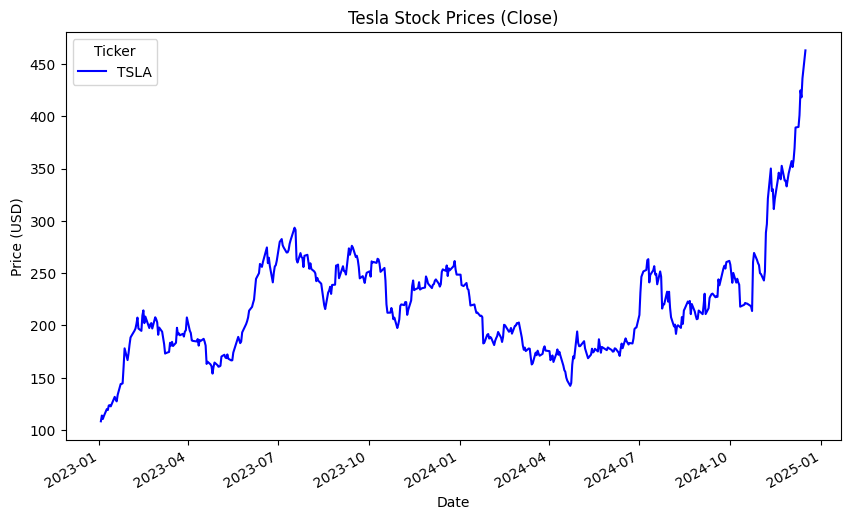

In [41]:
ticker = 'TSLA'  
start_date = '2023-01-01'  
end_date = datetime.now().strftime('%Y-%m-%d') 

tesla_data = yf.download(ticker, start=start_date, end=end_date)
print(tesla_data.head())

tesla_close = tesla_data['Close']
tesla_close.plot(title='Tesla Stock Prices (Close)', figsize=(10, 6), color='blue')
plt.ylabel('Price (USD)')
plt.show()


Training Data: 462 observations
Testing Data: 30 observations


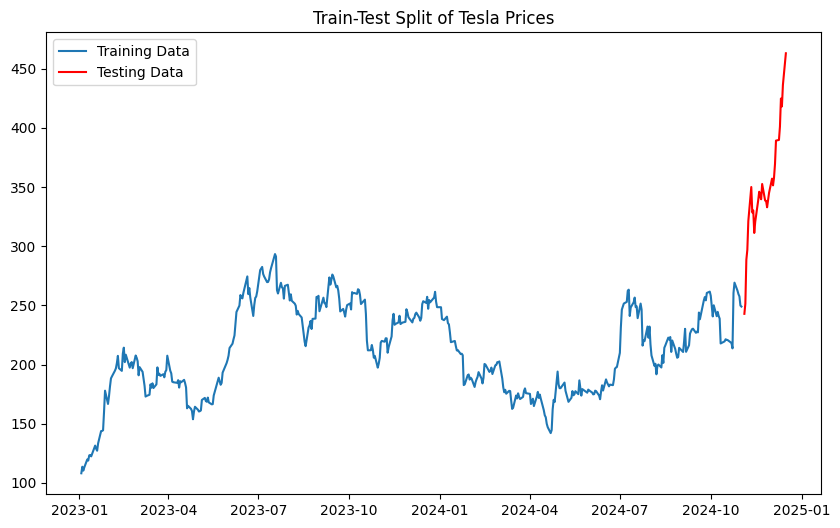

In [42]:
train_data = tesla_close[:-30]  
test_data = tesla_close[-30:]   

print(f"Training Data: {len(train_data)} observations")
print(f"Testing Data: {len(test_data)} observations")

# Plot the split
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data', color='red')
plt.title('Train-Test Split of Tesla Prices')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

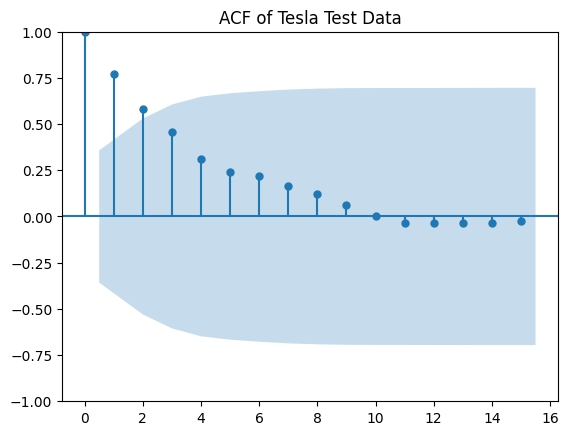

<Figure size 1000x600 with 0 Axes>

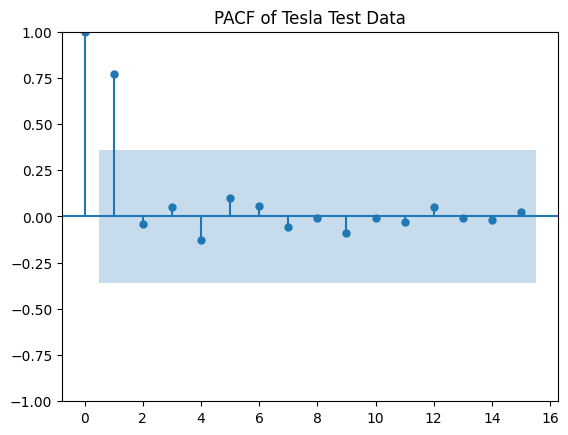

In [43]:
plt.figure(figsize=(10, 6))
plot_acf(test_data, title='ACF of Tesla Test Data')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(test_data, title='PACF of Tesla Test Data')
plt.show()

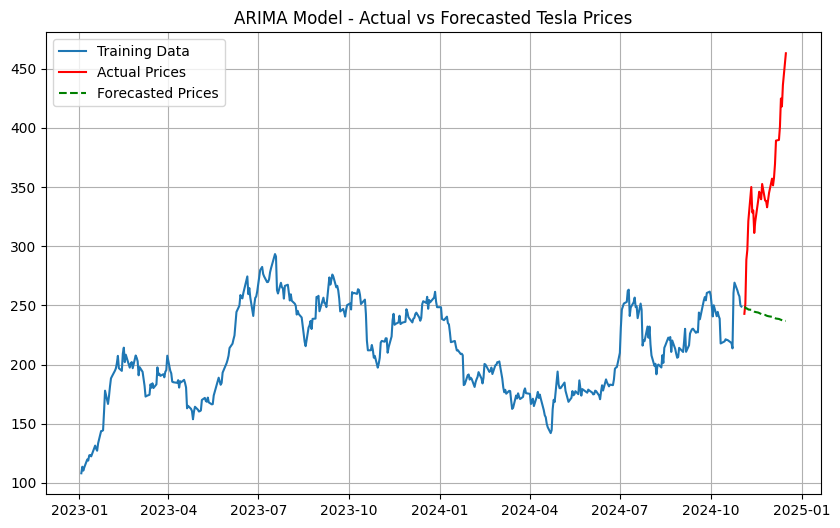

In [46]:



model = ARIMA(train_data, order=(2, 0, 3)  )
model_fit = model.fit()


forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Prices', color='red')
plt.plot(test_data.index, forecast, label='Forecasted Prices', color='green', linestyle='--')
plt.title('ARIMA Model - Actual vs Forecasted Tesla Prices')
plt.legend()
plt.grid()
plt.show()


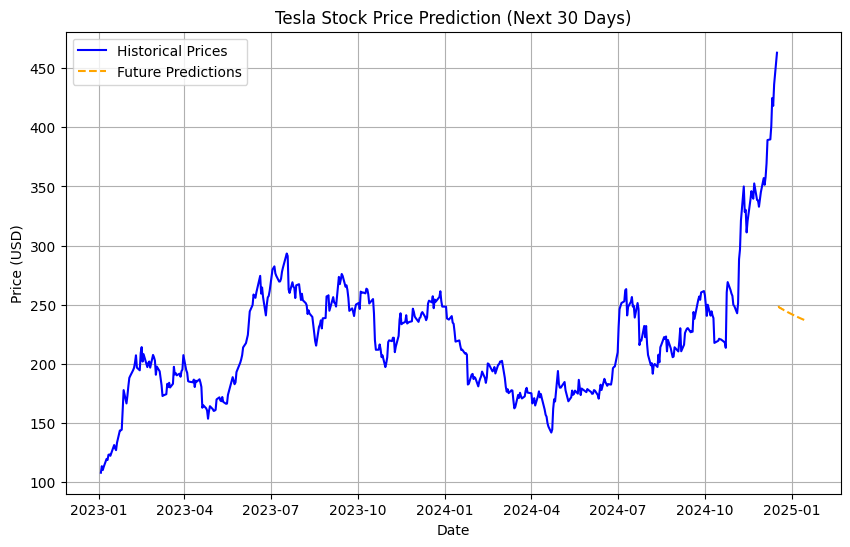

          Date  Forecasted Price
462 2024-12-17        248.059826
463 2024-12-18        248.275940
464 2024-12-19        247.321633
465 2024-12-20        247.227830
466 2024-12-21        246.471159
467 2024-12-22        246.244242
468 2024-12-23        245.613146
469 2024-12-24        245.308979
470 2024-12-25        244.759167
471 2024-12-26        244.411888
472 2024-12-27        243.916098
473 2024-12-28        243.546524
474 2024-12-29        243.087933
475 2024-12-30        242.708722
476 2024-12-31        242.276914
477 2025-01-01        241.895719
478 2025-01-02        241.484206
479 2025-01-03        241.105620
480 2025-01-04        240.710323
481 2025-01-05        240.337064
482 2025-01-06        239.955387
483 2025-01-07        239.589023
484 2025-01-08        239.219279
485 2025-01-09        238.860680
486 2025-01-10        238.501743
487 2025-01-11        238.151351
488 2025-01-12        237.802441
489 2025-01-13        237.460437
490 2025-01-14        237.120988
491 2025-0

In [45]:

future_days = 30
future_dates = pd.date_range(test_data.index[-1] + timedelta(days=1), periods=future_days)


future_forecast = model_fit.forecast(steps=future_days)


plt.figure(figsize=(10, 6))
plt.plot(tesla_close, label='Historical Prices', color='blue')
plt.plot(future_dates, future_forecast, label='Future Predictions', color='orange', linestyle='--')
plt.title('Tesla Stock Price Prediction (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


forecast_results = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_forecast})
print(forecast_results)
